# install required libraries

In [ ]:
! pip install scikit-learn
! pip install seaborn
! pip install numpy
! pip install matplotlib
! pip install pandas

# load libararies
First, we will import the required libraries.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline



Next, we will load the housing data from the scikit-learn library and understand it.

In [8]:
# Load the Boston housing dataset
data = pd.read_csv('boston.csv')
data.head()    


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Features explanation

To know more about the features use boston.csv The description of all the features is given below:

CRIM: Per capita crime rate by town.  

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


## Dvide data in features(X) and target(Y) parts

data: contains the information for various houses

prices: prices of the house

features: names of the features


In [9]:
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


 calculate minmum, maximum, average and median house price give us more idea about data 

In [11]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price*1000)) 
print("Maximum price: ${}".format(maximum_price*1000))
print("Mean price: ${}".format(mean_price*1000))
print("Median price ${}".format(median_price*1000))
print("Standard deviation of prices: ${}".format(std_price*1000))

Statistics for Boston housing dataset:

Minimum price: $5000.0
Maximum price: $50000.0
Mean price: $22532.806324110676
Median price $21200.0
Standard deviation of prices: $9188.011545278203


# Data Visualization

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

/home/amir/anaconda3/envs/Py36/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


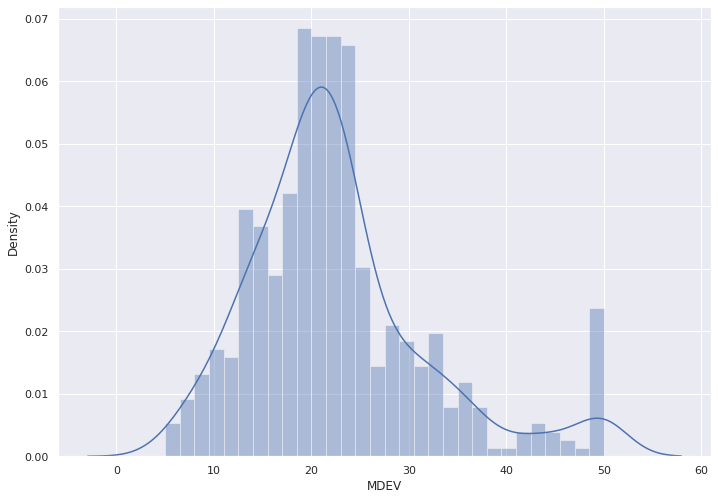

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(prices, bins=30)
plt.show()

Next, we create a correlation matrix that measures the linear relationships between the variables. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

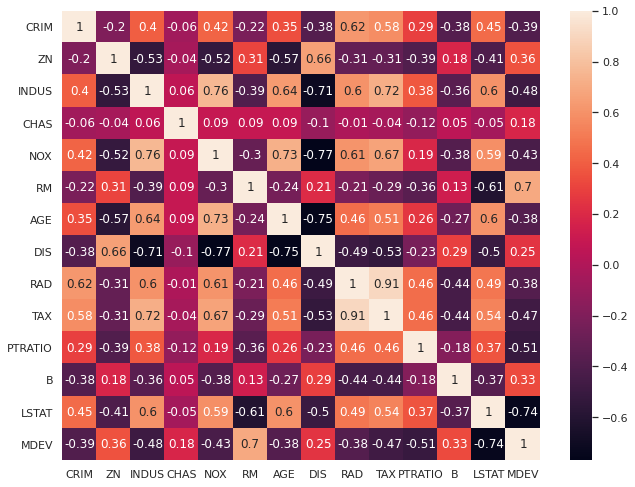

In [20]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

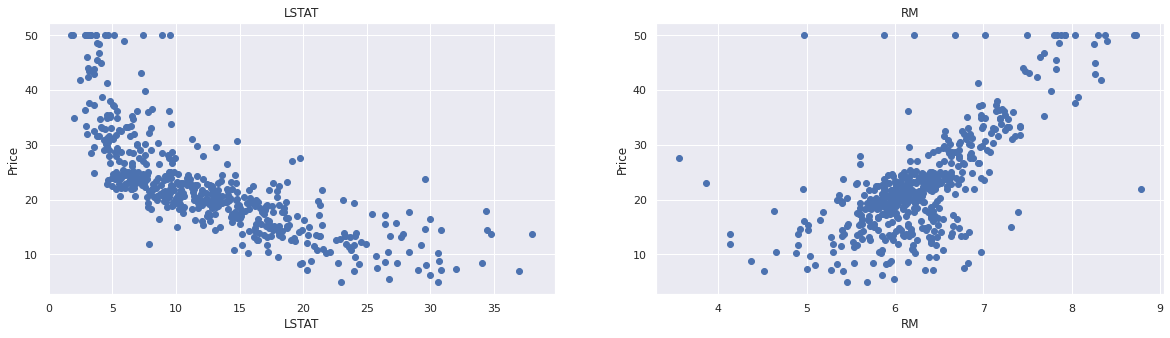

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = prices

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

# Observations:

    The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
    The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# Preparing the data for training the model

We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [9]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = prices

# Splitting the data into training and testing sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training and testing the model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

## test model

We will evaluate our model using RMSE and R2-score.

In [12]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


In [45]:
# Produce a matrix for client data
client_data = [[2.5, 7.2], # Client 1
               [3.2, 4.1], # Client 2
               [4.8, 7.3]]  # Client 3

# Show predictions
for i, price in enumerate(lin_model.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price*1000))

Predicted selling price for Client 1's home: $33,986.76
Predicted selling price for Client 2's home: $19,257.60
Predicted selling price for Client 3's home: $32,796.07
